<a href="https://colab.research.google.com/github/Shemonti/DDSCNet/blob/main/Breast_Histopathology_Images_BreastNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import fnmatch
import os
import PIL
import glob
import tensorflow as tf
from matplotlib.image import  imread
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt

from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x -Y "/content/drive/MyDrive/data_used (1).rar"

Streaming output truncated to the last 5000 lines.
Extracting  data_used/IDC/12906_idx5_x1701_y1701_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y1751_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y1801_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y1851_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y1901_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y1951_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y2001_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y2151_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y2201_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y2251_class1.png               35%  OK 
Extracting  data_used/IDC/129

In [ ]:
import pathlib
dt_dir='/content/data_used'
data_dir = pathlib.Path(dt_dir)
data_dir

PosixPath('/content/data_used')

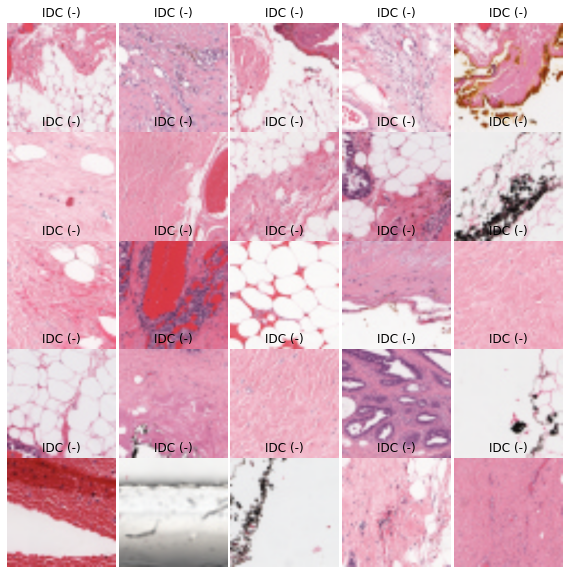

In [ ]:
NORMAL=list(data_dir.glob('NORMAL/*.png'))
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for imgname in NORMAL[:25]:
    im = cv2.imread(str(imgname))
    im = cv2.resize(im, (227, 227))
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.axis('off')
    plt.title('IDC (-)')
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB));
     #.set_title(l)

    i_ += 1

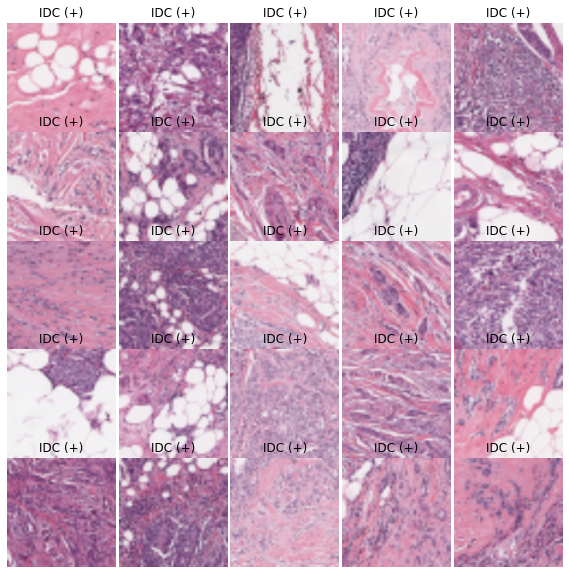

In [ ]:
IDC=list(data_dir.glob('IDC/*.png'))
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for imgname in IDC[:25]:




    im = cv2.imread(str(imgname))
    im = cv2.resize(im, (227, 227))
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.axis('off')
    plt.title('IDC (+)')
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB));
     #.set_title(l)

    i_ += 1

In [ ]:
breast_images_dict = {
    'IDC(-)': list(data_dir.glob('NORMAL/*.png')),
    'IDC(+)': list(data_dir.glob('IDC/*.png')),

}

In [ ]:
breast_labels_dict = {
    'IDC(-)': 0,
    'IDC(+)': 1

}

In [ ]:
X, y = [], []

for breast_name, images in breast_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        im = cv2.resize(img, (64, 64))
        X.append(im)
        y.append(breast_labels_dict[breast_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(7500, 64, 64, 3)

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
len(y)

7500

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.3, random_state=42)
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# y_val = to_categorical(y_val)
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(5250, 64, 64, 3) (675, 64, 64, 3) (1575, 64, 64, 3) (5250,) (675,) (1575,)


In [ ]:
y_val

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
len(X_train)

5250

In [ ]:
len(X_test)

675

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255
X_val_scaled = X_val / 255

In [ ]:
data_augmentation = keras.Sequential(
  [
   layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(64,
                                                              64,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

CONVXNET

In [ ]:
import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

In [ ]:
def Remnant_block(input_tensor, nb_of_input_channels, max_dilation, number_of_units):
  for i in range(number_of_units):
    x1 = Conv2D(nb_of_input_channels*2, kernel_size = (3,3), strides = (1,1), padding='same', dilation_rate= (1,1),activation='relu' )(input_tensor)
    x1 = BatchNormalization()(x1)

    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same',)(x1)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)
    x = Conv2D(nb_of_input_channels, kernel_size = (3,3), strides = (1,1), padding='same', dilation_rate= (1,1),)(x)
    x = BatchNormalization()(x)

    x = Add()([x, input_tensor])

    input_tensor = x

  return x

In [ ]:
def Lever_block(input_tensor, nb_of_input_channels, max_dilation):
    x1 = Conv2D(nb_of_input_channels*4, kernel_size = (3,3), strides = (1,1), padding='same', dilation_rate= (1,1),activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)

    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same',)(x1)
      temp = MaxPool2D(pool_size=(2,2))(temp)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)

    x = Conv2D(nb_of_input_channels*2, kernel_size = (3,3), strides = (1,1), padding='same', dilation_rate= (1,1),)(x)
    x = BatchNormalization()(x)

    return x

In [ ]:
def BreastNet(input_shape, nb_class, depth):
  xin = Input(shape= input_shape)

  x = Conv2D(16, kernel_size = (3,3), strides= (1,1), padding = 'same', activation='relu')(xin)
  x = BatchNormalization()(x)

  # x = Conv2D(32, kernel_size = (3,3), strides= (2,2), padding = 'same',activation='relu' )(x)
  # x = BatchNormalization()(x)

##Max Dilation rate will be vary in the range (1,4).

# Max Dilation rate is 4 for tensor (32x32x32)
  x = Remnant_block(input_tensor=x, nb_of_input_channels=16, max_dilation=4, number_of_units=depth)
  x = Lever_block(input_tensor=x, nb_of_input_channels=16, max_dilation=4)


# Max Dilation rate is 3 for (16x16x64)
  x = Remnant_block(input_tensor=x, nb_of_input_channels=32, max_dilation=3, number_of_units=depth)
  x = Lever_block(input_tensor=x, nb_of_input_channels=32, max_dilation=3)

# Max Dilation rate is 2 for (8x8x128)
  x = Remnant_block(input_tensor=x, nb_of_input_channels=64, max_dilation=2, number_of_units=depth)
  # x = Conv2D(128, kernel_size = (5,5), strides= (2,2), padding = 'same', activation='relu')(x)
  x = Conv2D(64, kernel_size = (5,5), strides= (2,2), padding = 'same', activation='relu')(x)
  x = GlobalMaxPooling2D()(x)

  x = Dense(64, activation='relu')(x)
  x = Dense(nb_class, activation= 'softmax')(x)

  model = Model(xin, x)

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  return model

In [ ]:
model = BreastNet(input_shape = (64, 64, 3), nb_class = 2, depth = 5)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 16)   448         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 64, 64, 16)  64          ['conv2d_1[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 conv2d_2 (Conv2D)              (None, 64, 64, 32)   4640        ['batch_normalization_1[0][0]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [ ]:
''' Callbacks with Checkpoint'''



accuracy_threshold = 0.98

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/best_moel/mymodel_dilateddepth5.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='min')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train_scaled, y_train, epochs=50,validation_data = (X_val_scaled,y_val),callbacks=[callback_list],batch_size=7)

Epoch 1/50
  6/750 [..............................] - ETA: 1:51 - loss: 3.4714 - accuracy: 0.6905

750/750 [==============================] - ETA: 0s - loss: 0.7070 - accuracy: 0.8055
Epoch 1: val_loss improved from inf to 1.03768, saving model to /content/drive/MyDrive/best_moel/mymodel_dilateddepth5.h5
750/750 [==============================] - 144s 164ms/step - loss: 0.7070 - accuracy: 0.8055 - val_loss: 1.0377 - val_accuracy: 0.7105
Epoch 2/50
750/750 [==============================] - ETA: 0s - loss: 0.3406 - accuracy: 0.8627
Epoch 2: val_loss improved from 1.03768 to 0.22801, saving model to /content/drive/MyDrive/best_moel/mymodel_dilateddepth5.h5
750/750 [==============================] - 122s 162ms/step - loss: 0.3406 - accuracy: 0.8627 - val_loss: 0.2280 - val_accuracy: 0.9086
Epoch 3/50
750/750 [==============================] - ETA: 0s - loss: 0.3094 - accuracy: 0.8783
Epoch 3: val_loss did not improve from 0.22801
750/750 [==============================] - 120s 160ms/step - loss: 0.3094 - accuracy: 0.8783 - val_loss: 0.2856 - val_accuracy: 0.8997
Epoch 4/50
750/750 [===

In [ ]:
model = load_model("/content/drive/MyDrive/best_moel/mymodel_dilateddepth5.h5")

In [ ]:
model.evaluate(X_test_scaled,y_test)

22/22 [==============================] - 4s 100ms/step - loss: 0.1147 - accuracy: 0.9615


[0.11471854895353317, 0.9614814519882202]

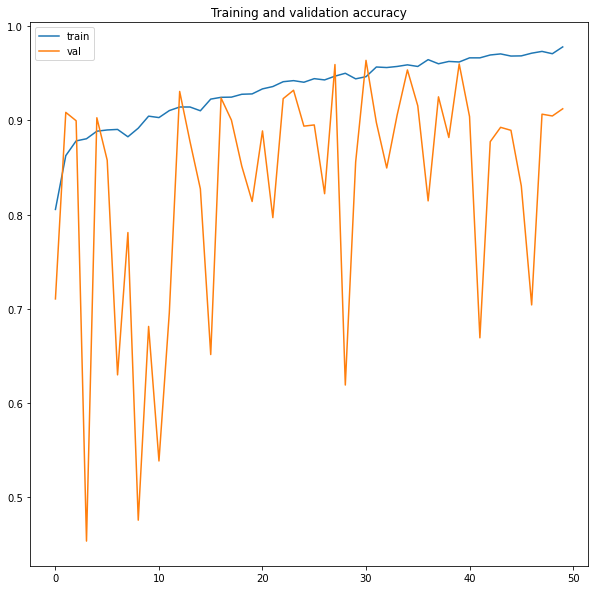

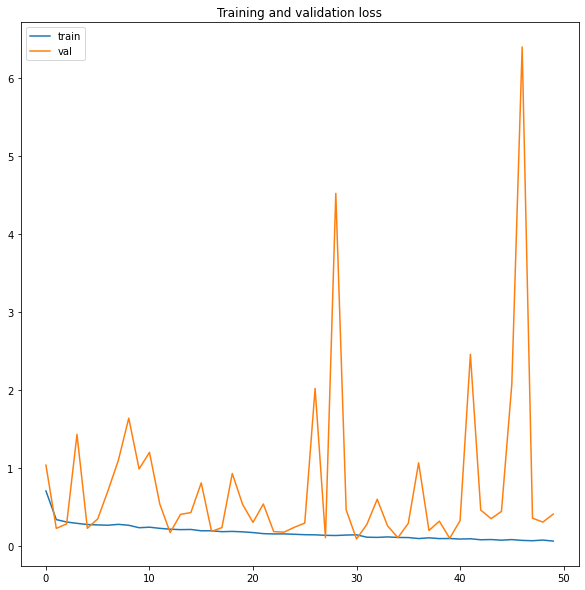

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )

plt.title ('Training and validation accuracy')
plt.legend(['train', 'val'])
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )
plt.legend(['train', 'val'])

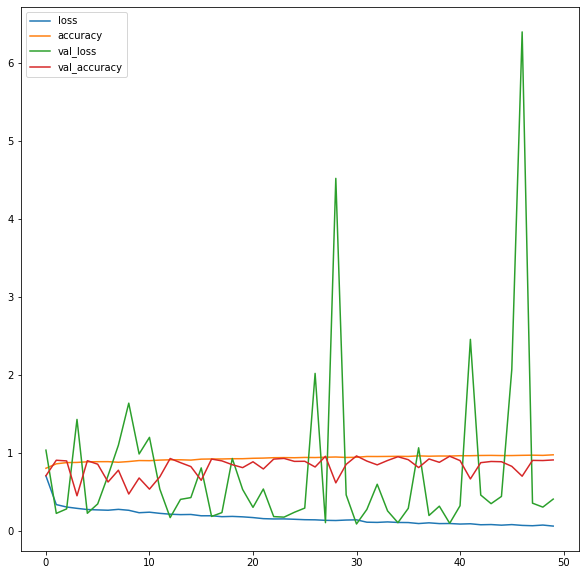

In [ ]:
model_loss = pd.DataFrame(history.history)
model_loss.plot()

In [ ]:
predictions = model.predict(X_test_scaled)
predictions[:5]

array([[9.99681234e-01, 3.18807026e-04],
       [1.00000000e+00, 7.62523084e-32],
       [2.97355205e-02, 9.70264494e-01],
       [5.58127202e-02, 9.44187224e-01],
       [1.14139214e-01, 8.85860741e-01]], dtype=float32)

In [ ]:
y_pred = [np.argmax(element) for element in predictions]
y_pred[:5]

[0, 0, 1, 1, 1]

In [ ]:
y_test[:5]

array([0, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))#depthwiseunit_depthwise_kernel=5

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       416
           1       0.94      0.96      0.95       259

    accuracy                           0.96       675
   macro avg       0.96      0.96      0.96       675
weighted avg       0.96      0.96      0.96       675



In [ ]:
confusion=(confusion_matrix(y_test,y_pred))

Text(87.0, 0.5, 'Truth')

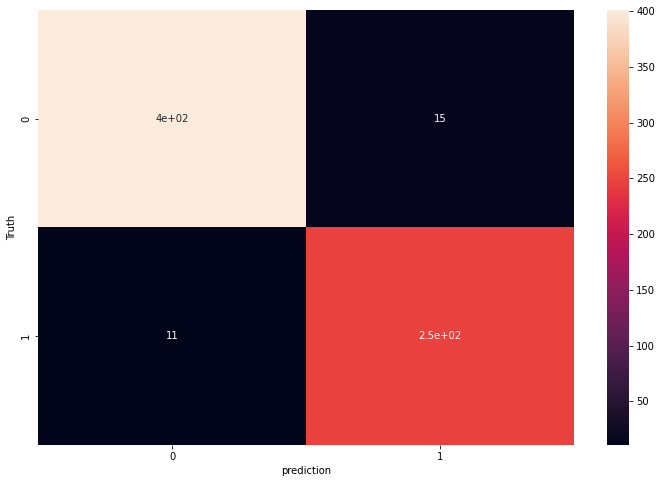

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion,annot=True)
plt.xlabel('prediction')
plt.ylabel('Truth')#depthwiseunit_depthwise_kernel=5

In [ ]:
from sklearn import metrics

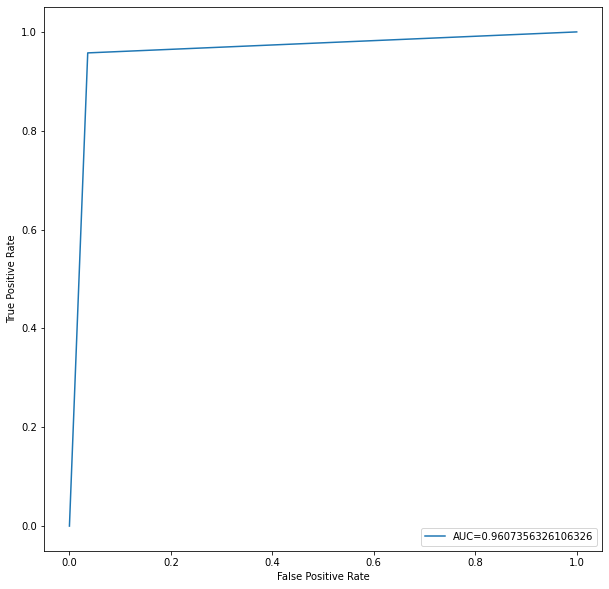

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()